In [2]:
!python --version

Python 3.9.16


In [1]:
import numpy as np
np.version.version

'1.23.5'

In [40]:
import tensorflow as tf
assert tf.__version__.startswith('2')

In [41]:
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [7]:
!pip3 install chardet

In [42]:
## 3 classes with RGB converted images.. bottom-20 corrupted dataset
data = DataLoader.from_folder("/home/stark/thesis/sram/dataxmc/tflite/dataset/corrupted-rgb")

INFO:tensorflow:Load image with size: 303, num_label: 3, labels: board002A, board0035, board0088.


INFO:tensorflow:Load image with size: 303, num_label: 3, labels: board002A, board0035, board0088.


In [69]:

train_data, test_data = data.split(0.8)





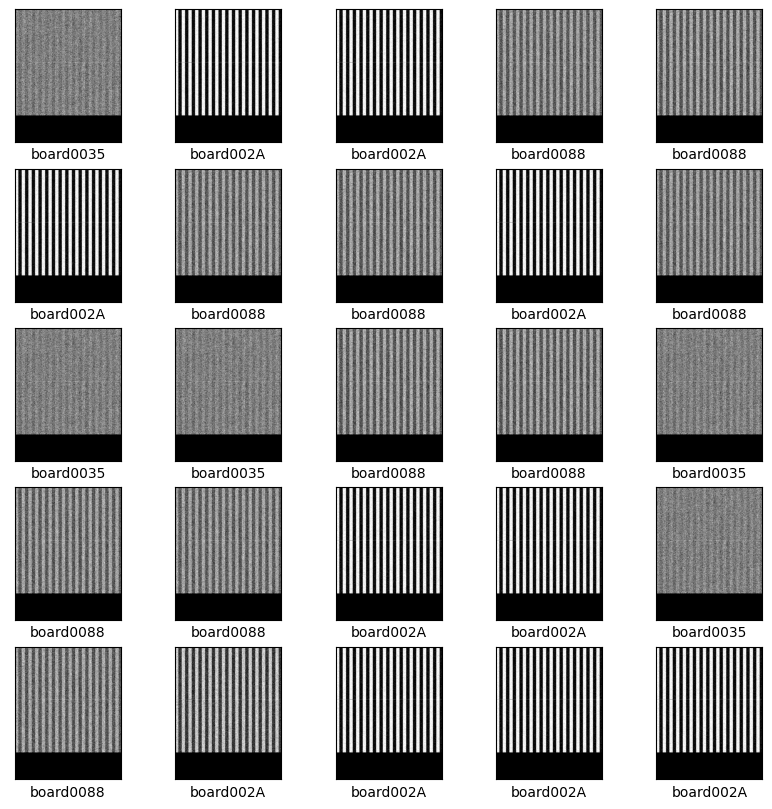

In [44]:
## show dataset with class labels
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()


In [72]:
## Mobilenetv2 
model = image_classifier.create(train_data, 
                                model_spec=model_spec.get('mobilenet_v2'), 
                                learning_rate=0.0005,
                                batch_size=32,
                                dropout_rate=0.70,
                                epochs=4)
                                


INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_31 (Hu  (None, 1280)             2257984   
 bKerasLayerV1V2)                                                
                                                                 
 dropout_31 (Dropout)        (None, 1280)              0         
                                                                 
 dense_31 (Dense)            (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/4
7/7 [==============================] - 9s 948ms/step - loss: 1.7293 - accuracy: 0.3839 - val_loss: 0.8569 - val_accuracy: 0.5410
Epoch 2/4
7/7 [==============================] - 6s 899ms/step - loss: 1.2119 - accuracy: 0.5

In [60]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_28 (Hu  (None, 1280)             2257984   
 bKerasLayerV1V2)                                                
                                                                 
 dropout_28 (Dropout)        (None, 1280)              0         
                                                                 
 dense_28 (Dense)            (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [61]:
loss, accuracy = model.evaluate(test_data)

2/2 [==============================] - 2s 210ms/step - loss: 0.3828 - accuracy: 0.9672


In [64]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs_range = range(4)

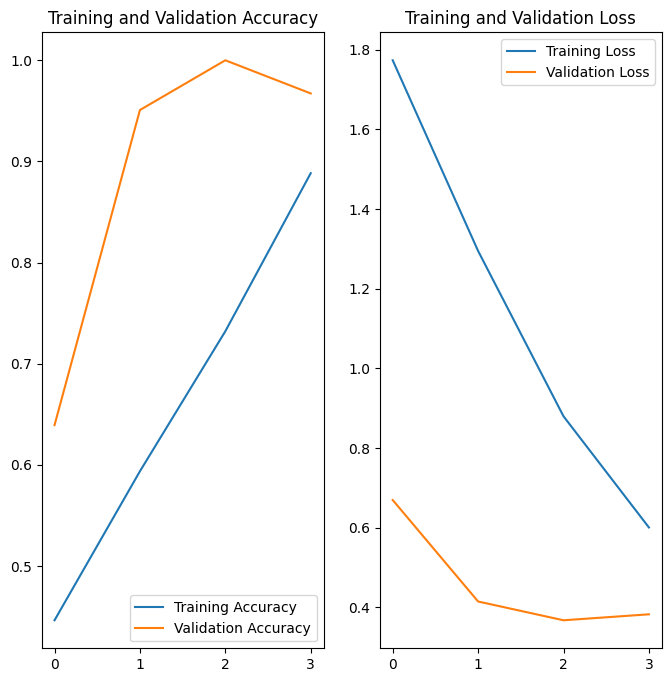

In [65]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [66]:
model.export(export_dir='/home/stark/thesis/sram/dataxmc/tflite/experiments/corrupted/mobilenetv2')

INFO:tensorflow:Assets written to: /tmp/tmpmoencw5c/assets


INFO:tensorflow:Assets written to: /tmp/tmpmoencw5c/assets
2023-07-15 13:10:04.954750: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-07-15 13:10:04.954924: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2023-07-15 13:10:05.029584: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1164] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 1639 nodes (1367), 2439 edges (2165), time = 33.967ms.
  function_optimizer: function_optimizer did nothing. time = 0.015ms.

/home/stark/miniconda3/envs/py39/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2023-07-15 13:10:06.700486: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Igno

INFO:tensorflow:Label file is inside the TFLite model with metadata.


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 3
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp3izoem6v/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp3izoem6v/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /home/stark/thesis/sram/dataxmc/tflite/experiments/corrupted/mobilenetv2/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /home/stark/thesis/sram/dataxmc/tflite/experiments/corrupted/mobilenetv2/model.tflite


In [67]:
model.export(export_dir='/home/stark/thesis/sram/dataxmc/tflite/experiments/corrupted/mobilenetv2/', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in /home/stark/thesis/sram/dataxmc/tflite/experiments/corrupted/mobilenetv2/labels.txt


INFO:tensorflow:Saving labels in /home/stark/thesis/sram/dataxmc/tflite/experiments/corrupted/mobilenetv2/labels.txt


In [68]:
model.evaluate_tflite('/home/stark/thesis/sram/dataxmc/tflite/experiments/corrupted/mobilenetv2/model.tflite', test_data)

{'accuracy': 0.9508196721311475}